In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = '/content/gdrive/MyDrive/Colab Notebooks/data2.json' # path of the file which has the processed data stored in JSON format

def load_data(data_path):
    '''
    function to load data from the JSON file
    param: data_path -> string -> the path of the JSON file which will be used to load data
    return: X -> ndarray -> the extracted input features from the loaded file
            Y -> ndarray -> the expected output for the corresponding inputs in X
    '''
    
    with open(data_path, 'r') as fp:
        data = json.load(fp)
    
    # converting list to ndarrays
    X = np.array(data['mfcc'])
    Y = np.array(data['labels'])
    print('Data Loaded Successfully!')
    
    return X, Y

X, Y = load_data(DATA_PATH) # loading data to X and Y

def plot_history(history):
    # function to plot the history of the training of the model
    
    fig, axs = plt.subplots(2)
    
    # plotting accuracy history of training and validation datasets
    axs[0].plot(history.history["accuracy"], label = 'train-accuracy')
    axs[0].plot(history.history["val_accuracy"], label = 'validation-accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epochs')
    axs[0].legend(loc = 'lower right')
    axs[0].set_title('Accuracy Evaluation')
    
    # plotting error history of training and validation datasets
    axs[1].plot(history.history["loss"], label = 'training-loss')
    axs[1].plot(history.history["val_loss"], label = 'validation-loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].legend('upper right')
    axs[1].set_title('Loss Evaluation')
    
    plt.show()
    
def prepare_dataset(validation_size, test_size):
    # function to split the dataset into traning, validation and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = validation_size)
    return X_train, X_val, X_test, Y_train, Y_val, Y_test



Data Loaded Successfully!


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 130, 60)           20160     
                                                                 
 lstm_21 (LSTM)              (None, 60)                29040     
                                                                 
 dense_34 (Dense)            (None, 64)                3904      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 batch_normalization_24 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_35 (Dense)            (None, 128)               8320      
                                                     

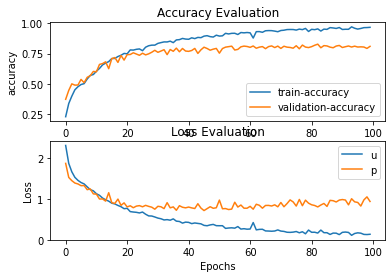

63/63 - 0s - loss: 0.8762 - accuracy: 0.8203 - 472ms/epoch - 7ms/step
Test Accuracy: 0.8203203082084656


In [14]:
def build_model(input_shape):
    # building a RNN-LSTM model
    model = keras.Sequential()
    
    # adding LSTM layers
    model.add(keras.layers.LSTM(60, input_shape = input_shape, return_sequences = True))
    model.add(keras.layers.LSTM(60))
    
    # dense neural network layer
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(128, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.BatchNormalization())
    # final softmax layer 
    model.add(keras.layers.Dense(10, activation = 'softmax'))

    return model

if(__name__ == '__main__'):
    X_train, X_val, X_test, Y_train, Y_val, Y_test = prepare_dataset(0.25, 0.20)
    
    input_shape = (X_train.shape[1], X_train.shape[2])
    model = build_model(input_shape)
    
    optimizer = keras.optimizers.Adam(learning_rate = 0.001)
    
    model.compile(optimizer = optimizer,
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    
    model.summary()
    
    history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size = 32, epochs = 100)
    
    plot_history(history)
    
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose = 2)
    
    print(f'Test Accuracy: {test_acc}')